Detektif Conan Edogawa/Shinichi Kudo sedang menyelidiki data-data dari kejahatan dari Boston. Dia ingin mengetahui apakah ada kejahatan yang akan terjadi pada masa mendatang. Jika ia dapat memprediksi kejahatan selanjutnya, ia dapat mencegah terjadinya kejahatan tersebut. Detektif Conan kemudian melihat data-data kejahatan boston, dan sebelum itu dia harus menjawab pertanyaan berikut:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
import numpy as np

In [27]:
crime = pd.read_csv("crime.csv", encoding="ISO-8859-1", dtype={"OFFENSE_CODE" : int})
df = pd.DataFrame(crime)
df

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0           I182080058          2403               Disorderly Conduct   
1           I182080053          3201                    Property Lost   
2           I182080052          2647                            Other   
3           I182080051           413               Aggravated Assault   
4           I182080050          3122                         Aircraft   
5           I182080049          1402                        Vandalism   
6           I182080048          3803  Motor Vehicle Accident Response   
7           I182080047          3301                  Verbal Disputes   
8           I182080045           802                   Simple Assault   
9           I182080044          3410                            Towed   
10          I182080043          3803  Motor Vehicle Accident Response   
11          I182080042           706                       Auto Theft   
12          I182080041          3006               Medical Assistance   
13          I182080040          3115               Investigate Person   
14          I182080039          3006               Medical Assistance   
15          I182080038          3831  Motor Vehicle Accident Response   
16          I182080037          2647                            Other   
17          I182080035          2647                            Other   
18          I182080034          3115               Investigate Person   
19          I182080031          3108             Fire Related Reports   
20          I182080030          3831  Motor Vehicle Accident Response   
21          I182080029           613                          Larceny   
22          I182080028          3114             Investigate Property   
23          I182080027          3301                  Verbal Disputes   
24          I182080027           619                          Larceny   
25          I182080026          2629                       Harassment   
26          I182080025           311                          Robbery   
27          I182080024          1842                   Drug Violation   
28          I182080023          3115               Investigate Person   
29          I182080022          3006               Medical Assistance   
...                ...           ...                              ...   
327790   I110551302-00          3125                  Warrant Arrests   
327791   I110551302-00           623                          Larceny   
327792   I110372326-00           403               Aggravated Assault   
327793   I110372326-00          3125                  Warrant Arrests   
327794   I110261417-00          3125                  Warrant Arrests   
327795   I110261417-00           619                          Larceny   
327796   I110177502-00          3125                  Warrant Arrests   
327797   I110177502-00           802                   Simple Assault   
327798   I110177502-00          3125                  Warrant Arrests   
327799   I100636670-00           629                          Larceny   
327800   I100636670-00          3125                  Warrant Arrests   
327801   I100340225-00          3125                  Warrant Arrests   
327802   I100340225-00           339                          Robbery   
327803   I100222105-02          3125                  Warrant Arrests   
327804   I100033064-00          2907                       Violations   
327805   I100033064-00          2910                       Violations   
327806   I090321958-00          3125                  Warrant Arrests   
327807   I090321958-00          3125                  Warrant Arrests   
327808   I090317057-00           403               Aggravated Assault   
327809   I090317057-00          3125                  Warrant Arrests   
327810   I080542626-00          3125                  Warrant Arrests   
327811   I080542626-00          1848                   Drug Violation   
327812   I080542626-00          1849                   Drug Viola

In [3]:
df.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

In [4]:
print("mode = ",df.mode().values[0])
print("skew = ",df.skew().values[0])
print("variance = ",df.var().values[0])
print("kurtosis = ",df.kurt(axis = 0).values[0])

mode =  ['I162030584' 3006.0 'Motor Vehicle Accident Response'
 'SICK/INJURED/MEDICAL - PERSON' 'B2' ' ' 'Y' '2016-08-01 00:00:00' 2017.0
 8.0 'Friday' 17.0 'Part Three' 'WASHINGTON ST' 42.34862382 -71.08277637
 '(0.00000000, 0.00000000)']
skew =  -0.4106446813468587
variance =  1404201.4731866436
kurtosis =  -1.4152258587558182


In [5]:
plotCrime = df['YEAR'].plot(kind = "hist",bins=[2015,2016,2017,2018,2019], rwidth=0.95, title = "Crimes Per Year")

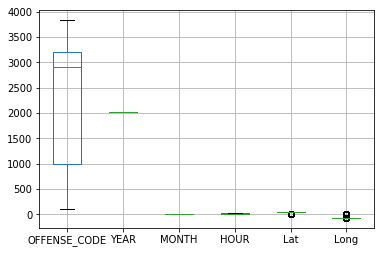

In [6]:
crimeBoxPlot = df.boxplot()

NOTE. Digunakan fungsi ditribusi hypergeometry dikarenakan peluang di success di sini bersifat non-replacement. Ekspetasi akan didapat dari pencarian mean dari fungsi bersangkutan.


a. Jika terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan yang:

i. Homicide

In [7]:
# terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan yang homicide
[M, n, N] = [len(df), len(df.loc[df['OFFENSE_CODE_GROUP']=='Homicide']), 1000]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_homicide = rv.pmf(x)

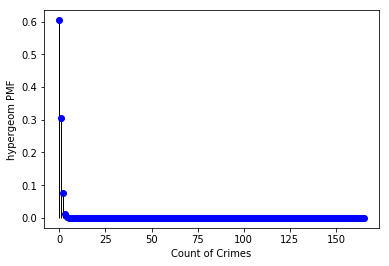

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, pmf_homicide, 'bo')
ax.vlines(x, 0, pmf_homicide, lw=1)
ax.set_xlabel('Count of Crimes')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [9]:
print("Possibility of x=1 num of homicide happened is",hypergeom.pmf(1, M, n, N,loc=0))
print("Expectation of the homicide happened is around",round(hypergeom.mean(M, n, N, loc=0)))

Possibility of x=1 num of homicide happened is 0.30507954646324864
Expectation of the homicide happened is around 1.0



ii. Homicide tanpa Shooting

In [10]:
# terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan yang homicide tanpa shooting
[M, n, N] = [len(df), len(df.loc[(df['OFFENSE_CODE_GROUP']=='Homicide') & (df['SHOOTING']!='Y')]), 1000]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_homicidewtshoot = rv.pmf(x)

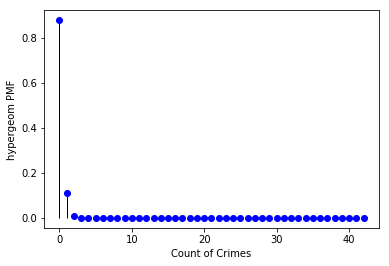

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, pmf_homicidewtshoot, 'bo')
ax.vlines(x, 0, pmf_homicidewtshoot, lw=1)
ax.set_xlabel('Count of Crimes')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [12]:
print("Possibility of x=1 num of homicide without shooting happened is",hypergeom.pmf(0, M, n, N,loc=0))
print("Expectation of the homicide without shooting happened is around",round(hypergeom.mean(M, n, N, loc=0)))

Possibility of x=1 num of homicide without shooting happened is 0.8795692889840541
Expectation of the homicide without shooting happened is around 0.0



iii. Terjadi Jam 20:00 dan Hari Sabtu

In [13]:
# terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan yang terjadi pada hari sabtu dan pada jam 20:00
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'], format='%Y-%m-%d %H:%M:%S.%f', utc=True)
df['hours'] = df.OCCURRED_ON_DATE.dt.hour
df['minute'] = df.OCCURRED_ON_DATE.dt.minute

[M, n, N] = [len(df), len(df.loc[(df['hours']==20) & (df['minute']==0) & (df['DAY_OF_WEEK']=='Saturday')]), 1000]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_crime = rv.pmf(x)

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, pmf_crime, 'bo')
ax.vlines(x, 0, pmf_crime, lw=1)
ax.set_xlabel('Count of Crimes')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [15]:
print("Possibility of x=1 num of crimes happened at 20:00 Saturday  is",hypergeom.pmf(1, M, n, N,loc=0))
print("Expectation of crimes happened at 20:00 Saturday is around",round(hypergeom.mean(M, n, N, loc=0)))

Possibility of x=1 num of crimes happened at 20:00 Saturday  is 0.3630168785708826
Expectation of crimes happened at 20:00 Saturday is around 1.0





b. Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang:
    
i. Terletak di Geneva Ave atau Prescott Street    

In [16]:
#Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang terletak di Geneva Ave atau Prescott Street
[M, n, N] = [len(df), len(df.loc[(df['STREET']=='GENEVA AVE') | (df['STREET']=='PRESCOTT ST')]), 2000]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_crime2 = rv.pmf(x)

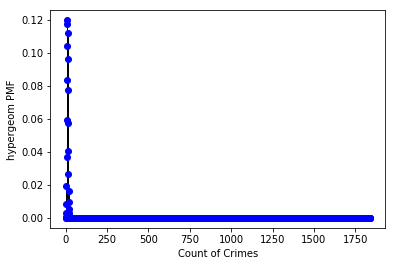

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, pmf_crime2, 'bo')
ax.vlines(x, 0, pmf_crime2, lw=1)
ax.set_xlabel('Count of Crimes')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [18]:
print("Possibility of x=11 num of crimes happened at Geneva Ave or Prescott Street is",hypergeom.pmf(11, M, n, N,loc=0))
print("Expectation of crimes happened Geneva Ave or Prescott Street is around",round(hypergeom.mean(M, n, N, loc=0)))

Possibility of x=11 num of crimes happened at Geneva Ave or Prescott Street is 0.11980489001097654
Expectation of crimes happened Geneva Ave or Prescott Street is around 11.0



ii. Dilaporkan di Kantor Polisi Nomor 495 dan District E18

In [19]:
#Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang dilaporkan di Kantor Polisi Nomor 495 dan District E18
[M, n, N] = [len(df), len(df.loc[(df['STREET']=='GENEVA AVE') | (df['STREET']=='PRESCOTT ST')]), 2000]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_crime3 = rv.pmf(x)

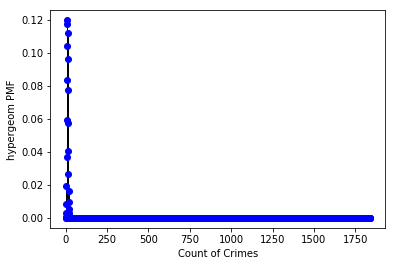

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, pmf_crime3, 'bo')
ax.vlines(x, 0, pmf_crime3, lw=1)
ax.set_xlabel('Count of Crimes')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [21]:
print("Possibility of x=11 num of crimes happened with 495 Reporting Area and E18 District is",hypergeom.pmf(11, M, n, N,loc=0))
print("Expectation of crimes happened with 495 Reporting Area and E18 District is around",round(hypergeom.mean(M, n, N, loc=0)))

Possibility of x=11 num of crimes happened with 495 Reporting Area and E18 District is 0.11980489001097654
Expectation of crimes happened with 495 Reporting Area and E18 District is around 11.0



iii. Tidak terjadi pada saat hari libur

In [22]:
#Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang Tidak terjadi pada saat hari libur (Minggu)
[M, n, N] = [len(df), len(df.loc[df['DAY_OF_WEEK'] != 'Sunday']), 2000]
rv = hypergeom(M, n, N)
x = np.arange(0, N+1)
pmf_crime4 = rv.pmf(x)

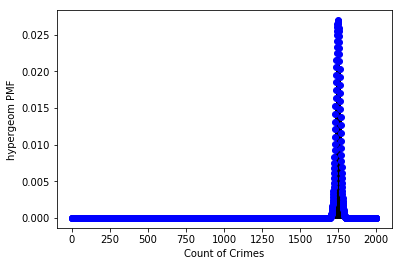

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, pmf_crime4, 'bo')
ax.vlines(x, 0, pmf_crime4, lw=1)
ax.set_xlabel('Count of Crimes')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [24]:
print("Possibility of x=11 num of crimes happened on other than weekend is",hypergeom.pmf(1748, M, n, N,loc=0))
print("Expectation of crimes happened on other than weekend is around",round(hypergeom.mean(M, n, N, loc=0)))

Possibility of x=11 num of crimes happened on other than weekend is 0.026943922109278595
Expectation of crimes happened on other than weekend is around 1748.0
